In [135]:
# https://nsidc.org/data/smap_l1_l3_anc_static/versions/1
import numpy as np
import xarray as xr
import netCDF4

In [136]:
fn = r"G:\Araki\SMSigxSMAP\1_data\SPL3SMP_EASEreference\SMAP_L3_SM_P_20181001_R18290_001.h5"
ncf = netCDF4.Dataset(fn, diskless=True, persist=False)
nch = ncf.groups.get('Soil_Moisture_Retrieval_Data_PM')
nch2 = nch.groups.get('landcover_class_pm')

nch_am = ncf.groups.get('Soil_Moisture_Retrieval_Data_AM')
nch_am_lat = nch.groups.get('latitude')
nch_am_lon = nch.groups.get('longitude')

In [137]:
nch_am.variables

{'EASE_column_index': <class 'netCDF4._netCDF4.Variable'>
 uint16 EASE_column_index(phony_dim_0, phony_dim_1)
     long_name: The column index of the 36 km EASE grid cell that contains the associated data.
     coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
     valid_min: 0
     valid_max: 963
     _FillValue: 65534
 path = /Soil_Moisture_Retrieval_Data_AM
 unlimited dimensions: 
 current shape = (406, 964)
 filling off,
 'EASE_row_index': <class 'netCDF4._netCDF4.Variable'>
 uint16 EASE_row_index(phony_dim_0, phony_dim_1)
     long_name: The row index of the 36 km EASE grid cell that contains the associated data.
     coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
     valid_min: 0
     valid_max: 405
     _FillValue: 65534
 path = /Soil_Moisture_Retrieval_Data_AM
 unlimited dimensions: 
 current shape = (406, 964)
 filling off,
 'albedo': <class 'netCDF4._netCDF4.Variable'>
 float32

In [138]:
nch.variables

{'EASE_column_index_pm': <class 'netCDF4._netCDF4.Variable'>
 uint16 EASE_column_index_pm(phony_dim_3, phony_dim_4)
     long_name: The column index of the 36 km EASE grid cell that contains the associated data.
     coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
     valid_min: 0
     valid_max: 963
     _FillValue: 65534
 path = /Soil_Moisture_Retrieval_Data_PM
 unlimited dimensions: 
 current shape = (406, 964)
 filling off,
 'EASE_row_index_pm': <class 'netCDF4._netCDF4.Variable'>
 uint16 EASE_row_index_pm(phony_dim_3, phony_dim_4)
     long_name: The row index of the 36 km EASE grid cell that contains the associated data.
     coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
     valid_min: 0
     valid_max: 405
     _FillValue: 65534
 path = /Soil_Moisture_Retrieval_Data_PM
 unlimited dimensions: 
 current shape = (406, 964)
 filling off,
 'albedo_dca_pm': <class 'netCDF4._netCDF4.

```
 'landcover_class_pm': <class 'netCDF4._netCDF4.Variable'>
 uint8 landcover_class_pm(phony_dim_3, phony_dim_4, phony_dim_5)
     _FillValue: 254
     long_name: An enumerated type that specifies the most common landcover class in the grid cell based on the IGBP landcover map. The array order is longitude (ascending), followed by latitude (descending), and followed by IGBP land cover type descending dominance (only the first three types are listed)
     coordinates: /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Retrieval_Data_AM/longitude
 path = /Soil_Moisture_Retrieval_Data_PM
 unlimited dimensions: 
 current shape = (406, 964, 3)
 filling off,
 ```

c:\Users\raraki8159\.conda\envs\SMAP_v2\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\raraki8159\.conda\envs\SMAP_v2\Lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


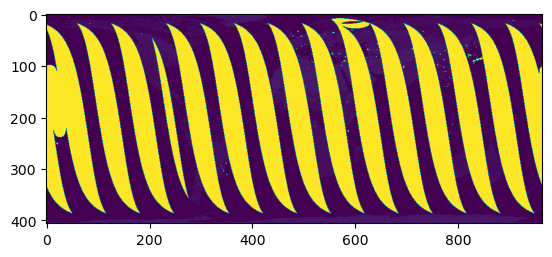

In [139]:
xds_pm = xr.open_dataset(fn, engine='rasterio', group='Soil_Moisture_Retrieval_Data_PM', variable='landcover_class_pm')
xds_pm = xds_pm.rename({'band': 'x', 'x':'band'})
xds_pm = xds_pm.transpose('band', 'y', 'x')
IGBPclass_pm = xds_pm.Soil_Moisture_Retrieval_Data_PM_landcover_class_pm[0].values.transpose()
plt.imshow(IGBPclass_pm)

c:\Users\raraki8159\.conda\envs\SMAP_v2\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\raraki8159\.conda\envs\SMAP_v2\Lib\site-packages\rioxarray\_io.py:1111: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


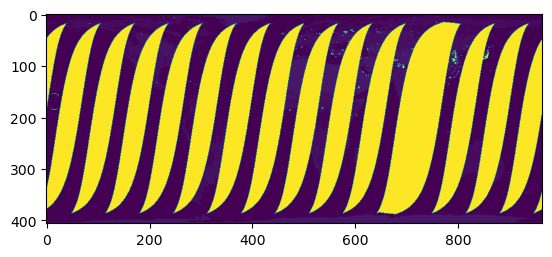

In [140]:
xds_am = xr.open_dataset(fn, engine='rasterio', group='Soil_Moisture_Retrieval_Data_AM', variable='landcover_class')
xds_am = xds_am.rename({'band': 'x', 'x':'band'})
xds_am = xds_am.transpose('band', 'y', 'x')
xds_am
IGBPclass_am = xds_am.Soil_Moisture_Retrieval_Data_AM_landcover_class[0].values.transpose()
plt.imshow(IGBPclass_am)

In [166]:
xds_lat = xr.open_dataset(fn, engine='rasterio', group='Soil_Moisture_Retrieval_Data_AM', variable='latitude')
lat = xds_lat['Soil_Moisture_Retrieval_Data_AM_latitude'][0].values

In [167]:
xds_lon = xr.open_dataset(fn, engine='rasterio', group='Soil_Moisture_Retrieval_Data_AM', variable='longitude')
lon = xds_lon['Soil_Moisture_Retrieval_Data_AM_longitude'][0].values

In [156]:
lat[:,0].transpose()

array([-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
       -9.9990000e+03, -9.9990000e+03, -9.9990000e+03, -9.9990000e+03,
      

In [144]:
lon[0,:]

array([-179.81328   , -179.43983   , -179.06639   , -178.69295   ,
       -178.3195    , -177.94606   , -177.57262   , -177.19917   ,
       -176.82573   , -176.45229   , -176.07884   , -175.7054    ,
       -175.33195   , -174.95851   , -174.58507   , -174.21162   ,
       -173.83818   , -173.46474   , -173.0913    , -172.71785   ,
       -172.34439   , -171.97095   , -171.5975    , -171.22406   ,
       -170.85062   , -170.47717   , -170.10373   , -169.73029   ,
       -169.35684   , -168.9834    , -168.60995   , -168.23651   ,
       -167.86307   , -167.48962   , -167.11618   , -166.74274   ,
       -166.3693    , -165.99585   , -165.6224    , -165.24896   ,
       -164.87552   , -164.50208   , -164.12863   , -163.75519   ,
       -163.38174   , -163.0083    , -162.63486   , -162.26141   ,
       -161.88797   , -161.51453   , -161.14108   , -160.76764   ,
       -160.3942    , -160.02075   , -159.64731   , -159.27386   ,
       -158.90042   , -158.52698   , -158.15353   , -157.78009

In [168]:
lat[lat==-9999] =np.nan
lon[lon==-9999] =np.nan

In [169]:
xds_IGBPclass = xr.Dataset(
        {
        "IGBPclass_am": (["y", "x"], IGBPclass_am),
        "IGBPclass_pm": (["y", "x"], IGBPclass_pm)
        },
        coords={
            'y': lat[:,0],
            'x': lon[0,:],
        }
    )
xds_IGBPclass = xds_IGBPclass.set_coords(["x", "y"])
xds_IGBPclass.rio.write_crs('epsg:4326', inplace=True)
xds_IGBPclass.IGBPclass_am.values

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [12., 15., 15., ..., 15., 15., 12.]], dtype=float32)

In [159]:
xds_IGBPclass = xr.Dataset(
        {
        "IGBPclass_am": (["y", "x"], IGBPclass_am),
        "IGBPclass_pm": (["y", "x"], IGBPclass_pm)
        },
        coords={
            'lat': (["y", "x"], np.squeeze(lat)),
            'lon': (["y", "x"], np.squeeze(lon)),
        }
    )
xds_IGBPclass = xds_IGBPclass.set_coords(["lat", "lon"])
xds_IGBPclass.rio.write_crs('epsg:4326', inplace=True)
xds_IGBPclass

<xarray.Dataset>
Dimensions:       (y: 406, x: 964)
Coordinates:
    lat           (y, x) float32 nan 83.63 83.63 83.63 ... -83.63 -83.63 -83.63
    lon           (y, x) float32 -179.8 -179.4 -179.1 ... 179.1 179.4 179.8
    spatial_ref   int32 0
Dimensions without coordinates: y, x
Data variables:
    IGBPclass_am  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 15.0 15.0 15.0 12.0
    IGBPclass_pm  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 15.0 15.0 15.0 12.0

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

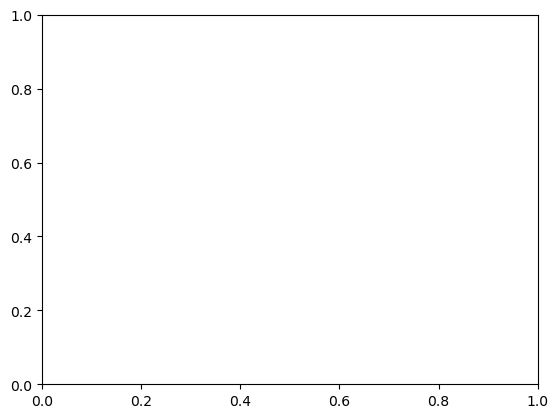

In [170]:
xds_IGBPclass['IGBPclass_am'] = xds_IGBPclass['IGBPclass_am'].where(xds_IGBPclass['IGBPclass_am'] != 254, np.nan)
xds_IGBPclass['IGBPclass_pm'] = xds_IGBPclass['IGBPclass_pm'].where(xds_IGBPclass['IGBPclass_pm'] != 254, np.nan)
xds_IGBPclass = xds_IGBPclass.sel(y=slice(None, None, -1))
xds_IGBPclass.IGBPclass_am.plot()
# xds_IGBPclass.IGBPclass_pm.plot()

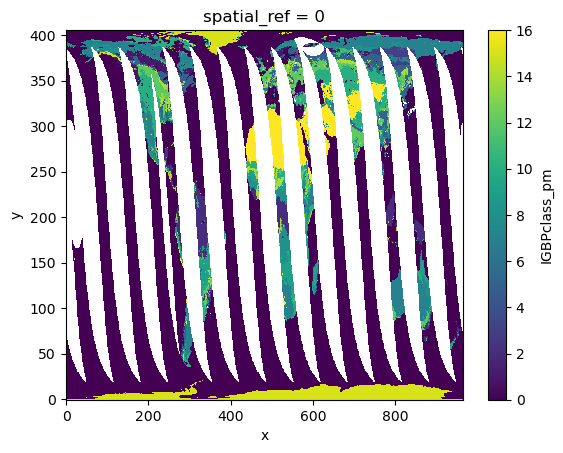

In [161]:
xds_IGBPclass.IGBPclass_pm.plot()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

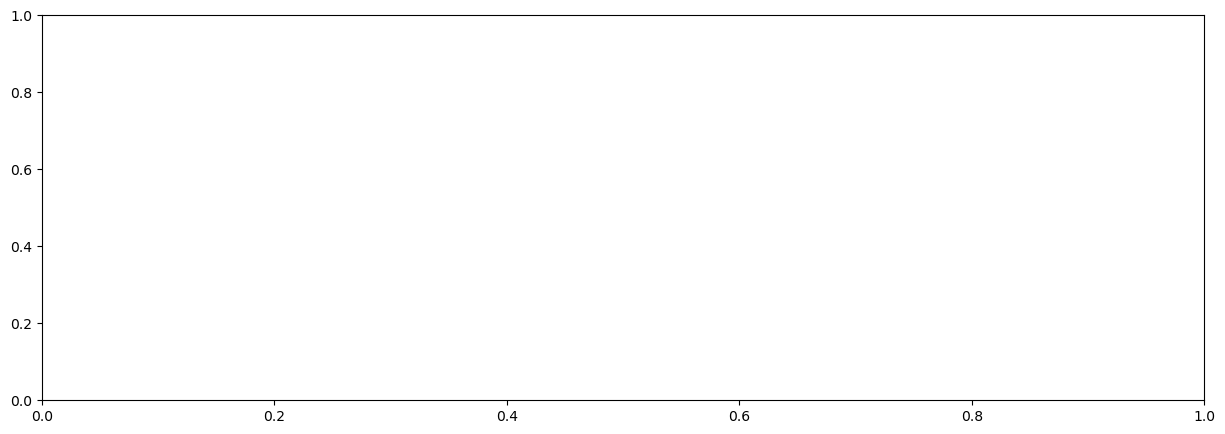

In [165]:
fig, ax = plt.subplots(figsize=(15,5))
xds_IGBPclass.IGBPclass_am.plot(ax=ax, x=lon, y=lat)
xds_IGBPclass.IGBPclass_pm.plot(ax=ax, x=lon, y=lat)

In [163]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

KeyError: 'IGBPclass'

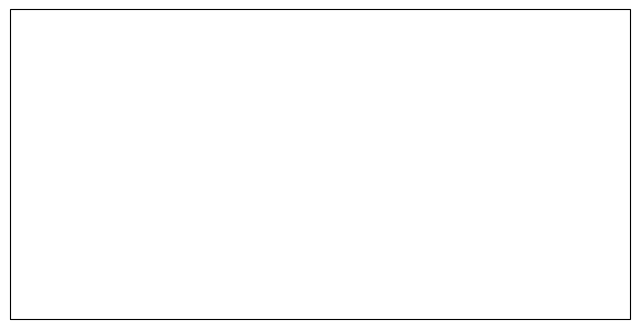

In [164]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8,5))
xds_IGBPclass['IGBPclass'].plot(x="lon", y="lat", ax=ax, transform=ccrs.PlateCarree())
# Add continent outlines
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

In [ ]:
# landcover_class